# 1. EDA

In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [465]:
df = pd.read_csv("dataset_w2.csv", quotechar='"', skipinitialspace=True)

In [466]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


**List of columns and their meaning:**

- **Index**: Row index or unique ID.
- **Title**: Title of the property listing.
- **Description**: Text description of the property.
- **Amount(in rupees)**: Total price of the property (may include text like "1.5 Cr").
- **Price (in rupees)**: Price per unit area.
- **location**: Location of the property.
- **Carpet Area**: Usable internal area of the property.
- **Status**: Construction status (e.g., Ready to Move, Under Construction).
- **Floor**: Floor information in format like "2 out of 10".
- **Transaction**: Type of transaction (New or Resale).
- **Furnishing**: Level of furnishing (Furnished, Semi-furnished, Unfurnished).
- **facing**: Direction the property faces.
- **overlooking**: What the property overlooks (e.g., park, main road).
- **Society**: Name of the residential complex or society.
- **Bathroom**: Number of bathrooms.
- **Balcony**: Number of balconies.
- **Car Parking**: Availability of car parking space.
- **Ownership**: Ownership type (Freehold, Leasehold, etc.).
- **Super Area**: Built-up area including walls and shared spaces.
- **Dimensions**: Dimensions of the property (length × width).
- **Plot Area**: Total land area.


In [467]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [468]:
df.isnull().sum()

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

In [469]:
missing_data = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percent (%)': (df.isnull().sum() / len(df)) * 100
})
missing_data['Percent (%)'] = missing_data['Percent (%)'].round(1)
missing_data = missing_data.sort_values(by='Missing Values', ascending=False)
print(missing_data)


                   Missing Values  Percent (%)
Plot Area                  187531        100.0
Dimensions                 187531        100.0
Society                    109678         58.5
Super Area                 107685         57.4
Car Parking                103357         55.1
overlooking                 81436         43.4
Carpet Area                 80673         43.0
facing                      70233         37.5
Ownership                   65517         34.9
Balcony                     48935         26.1
Price (in rupees)           17665          9.4
Floor                        7077          3.8
Description                  3023          1.6
Furnishing                   2897          1.5
Bathroom                      828          0.4
Status                        615          0.3
Transaction                    83          0.0
Amount(in rupees)               0          0.0
Title                           0          0.0
Index                           0          0.0
location     

In [470]:
df = df.drop(columns=['Plot Area', 'Dimensions'])

In [471]:
df = df.apply(lambda col: col.str.replace(r'\s+', ' ', regex=True).str.strip() if col.dtypes == 'object' else col)

## 1.1. Amount

In [472]:
# Target variable: "Amount(in rupees)"
areas = df['Amount(in rupees)'].dropna().astype(str).str.lower()
def extract_unit(text):
    match = re.search(r'[a-z]+', text)
    return match.group(0) if match else 'unknown'
units = areas.apply(extract_unit).unique()
print("Unique units found in 'Amount(in rupees)':")
for u in units:
    print(u)

Unique units found in 'Amount(in rupees)':
lac
cr
call


In [473]:
# Convert to the same unit (rupees)
def parse_amount(val):
    if pd.isna(val):
        return np.nan
    val = val.strip().replace(',', '')
    match = re.match(r"([\d\.]+)\s*(Lac|Cr)?", val, re.IGNORECASE)
    if match:
        amount = float(match.group(1))
        unit = match.group(2)
        if unit:
            unit = unit.lower()
            if unit == 'lac':
                return amount * 1e5
            elif unit == 'cr':
                return amount * 1e7
        else:
            return amount
    return np.nan
df['Amount_clean'] = df['Amount(in rupees)'].apply(parse_amount)

# Test
print(df[['Amount(in rupees)', 'Amount_clean']].head(10))

  Amount(in rupees)  Amount_clean
0            42 Lac     4200000.0
1            98 Lac     9800000.0
2           1.40 Cr    14000000.0
3            25 Lac     2500000.0
4           1.60 Cr    16000000.0
5            45 Lac     4500000.0
6          16.5 Lac     1650000.0
7            60 Lac     6000000.0
8            60 Lac     6000000.0
9           1.60 Cr    16000000.0


In [474]:
print(df['Amount_clean'].describe())

count    1.778470e+05
mean     1.198134e+07
std      3.943827e+07
min      1.000000e+05
25%      4.840000e+06
50%      7.800000e+06
75%      1.450000e+07
max      1.400300e+10
Name: Amount_clean, dtype: float64


In [475]:
def plot_hist_box(data, title):
    cleaned_data = data[title].dropna()
    
    if (cleaned_data <= 0).any():
        print(f"Warning {sum(cleaned_data <= 0)} record <= 0 in '{title}'")

    positive_data = cleaned_data[cleaned_data > 0]
    log_data = np.log(positive_data)

    # Histogram
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    sns.histplot(cleaned_data.dropna(), bins=50, kde=True, color='teal')
    plt.title("Histogram of " + title)
    plt.xlabel(title)
    plt.ylabel("Count")
    plt.xlim(0, cleaned_data.max() * 1.1)

    # Histogram log
    plt.subplot(122)
    sns.histplot(log_data, bins=50, kde=True, color='teal')
    plt.title("Histogram of Log " + title)
    plt.xlabel(f"Log({title})")
    plt.ylabel("Count")
    plt.xlim(0, log_data.max() * 1.1)
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 4))
    plt.boxplot(cleaned_data, vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red'))
    plt.xlabel(title)
    plt.title("Boxplot of " + title)
    plt.tight_layout()
    plt.show()


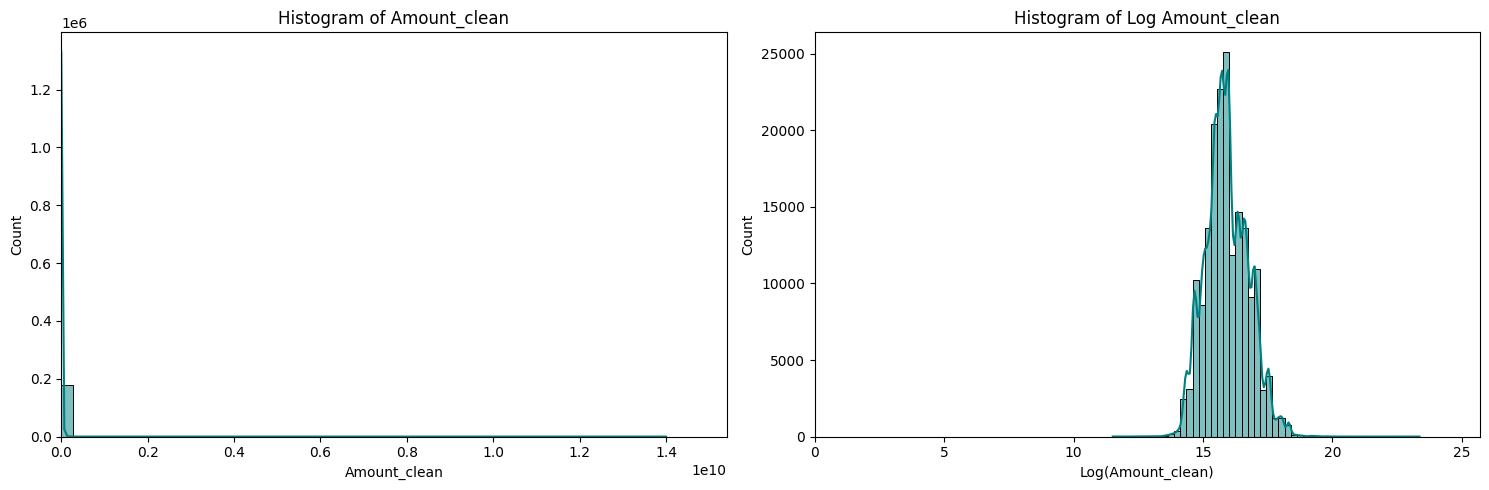

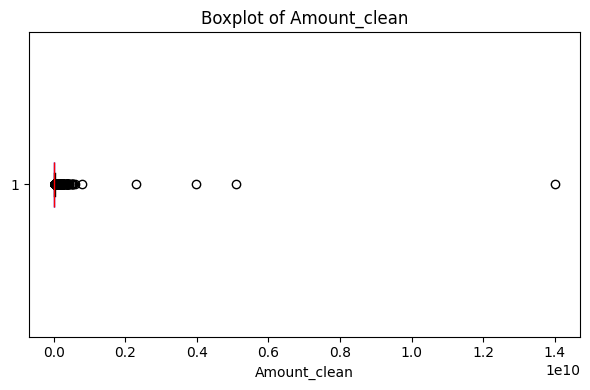

In [476]:
plot_hist_box(df, 'Amount_clean')

In [477]:
def plot_hist_box_remove_outlier(data, title, title_filtered):
    # Remove outliers using IQR method
    Q1 = data[title].quantile(0.25)
    Q3 = data[title].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    data[title_filtered] = data[title].where(
        (data[title] >= lower_bound) & (data[title] <= upper_bound)
    )

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data[title_filtered].dropna(), bins=50, kde=True, color='teal')
    plt.title(title + " (outliers removed)")
    plt.xlabel(title + " (in rupees)")
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    plt.boxplot(data[title_filtered].dropna(), vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'), 
            medianprops=dict(color='red'))
    plt.xlabel(title +" (in rupees)")
    plt.title("Boxplot " + title + " (outliers removed)")
    plt.tight_layout()
    plt.show()

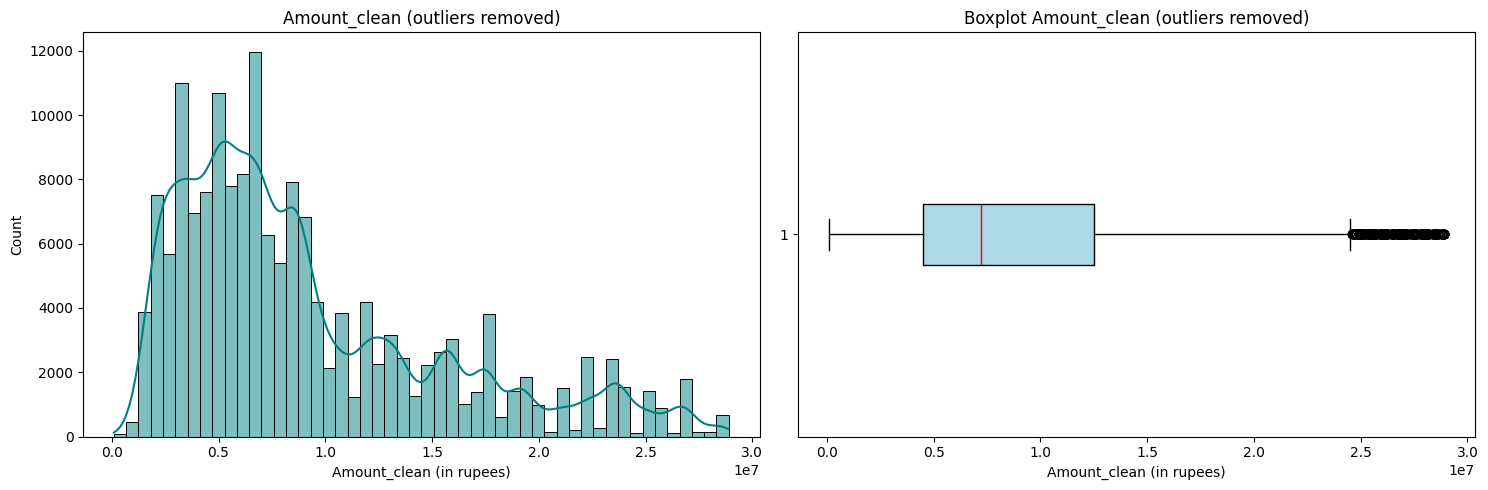

In [478]:
plot_hist_box_remove_outlier(df, 'Amount_clean', 'Amount_filtered')

## 1.2. Price

In [479]:
areas = df['Price (in rupees)'].dropna().astype(str).str.lower()
def extract_unit(text):
    match = re.search(r'[a-z]+', text)
    return match.group(0) if match else 'unknown'
units = areas.apply(extract_unit).unique()
print("Unique units found in 'Price (in rupees)':")
for u in units:
    print(u)

Unique units found in 'Price (in rupees)':
unknown


Warning 11 record <= 0 in 'Price (in rupees)'


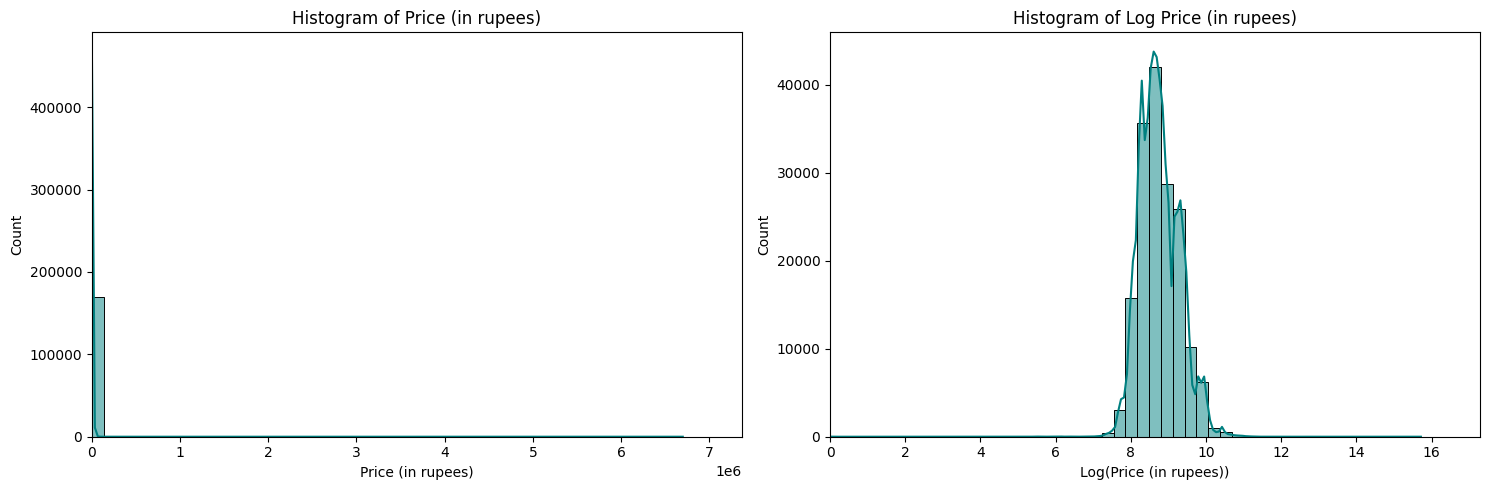

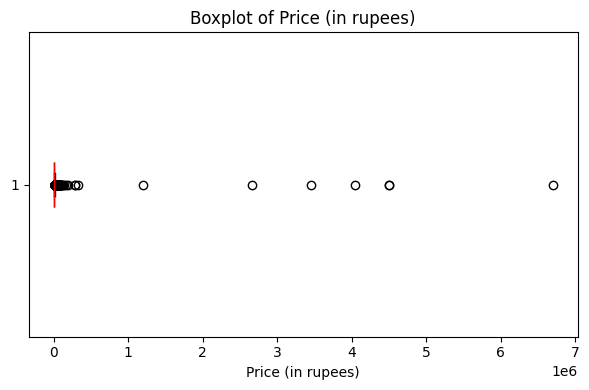

In [480]:
plot_hist_box(df, 'Price (in rupees)')

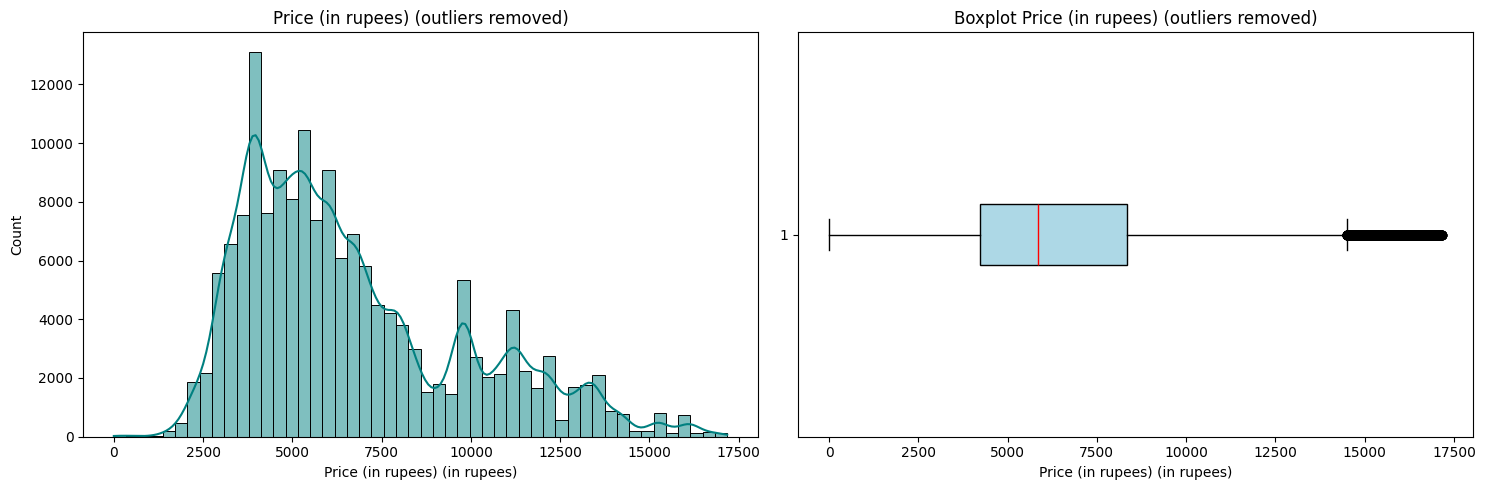

In [481]:
plot_hist_box_remove_outlier(df, 'Price (in rupees)', 'Price_filtered')

## 1.3. Location

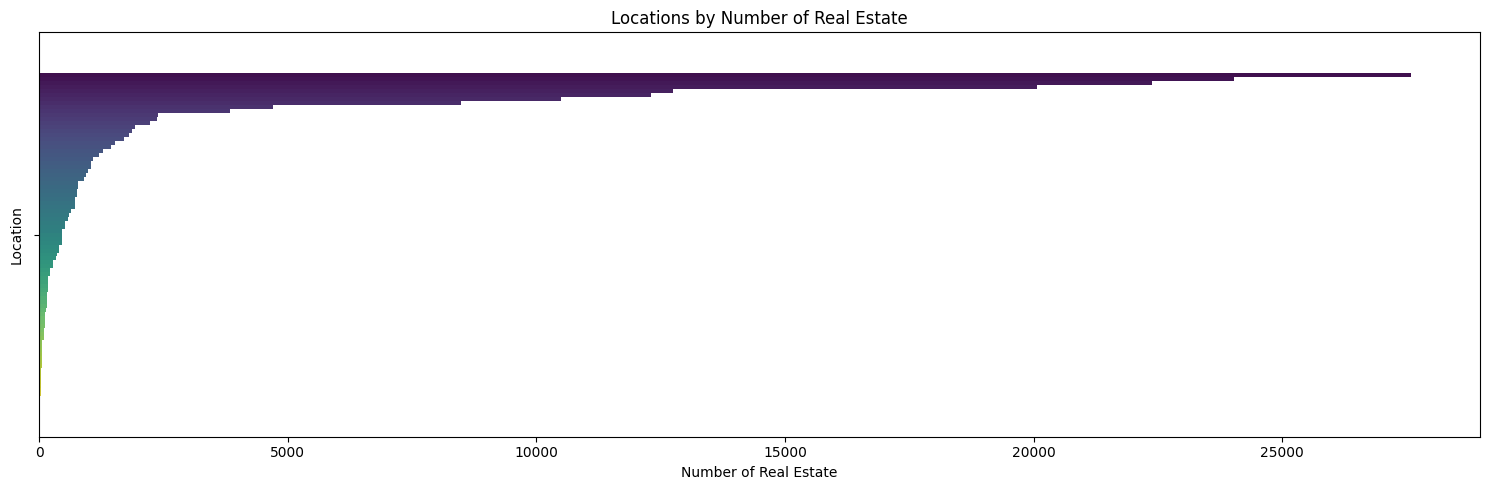

In [482]:
plt.figure(figsize=(15, 5))
top_locations = df['location'].value_counts()
sns.barplot(x=top_locations.values, hue=top_locations.index, palette="viridis")
plt.title("Locations by Number of Real Estate")
plt.xlabel("Number of Real Estate") 
plt.ylabel("Location")
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

In [483]:
def group_small_categories_percent(df, col_name, percent_threshold=1):
    percent = df[col_name].value_counts(normalize=True) * 100
    categories_to_keep = percent[percent >= percent_threshold].index
    df[col_name] = df[col_name].apply(lambda x: x if x in categories_to_keep else 'Other')
    return df
df = group_small_categories_percent(df, 'location', percent_threshold=1)

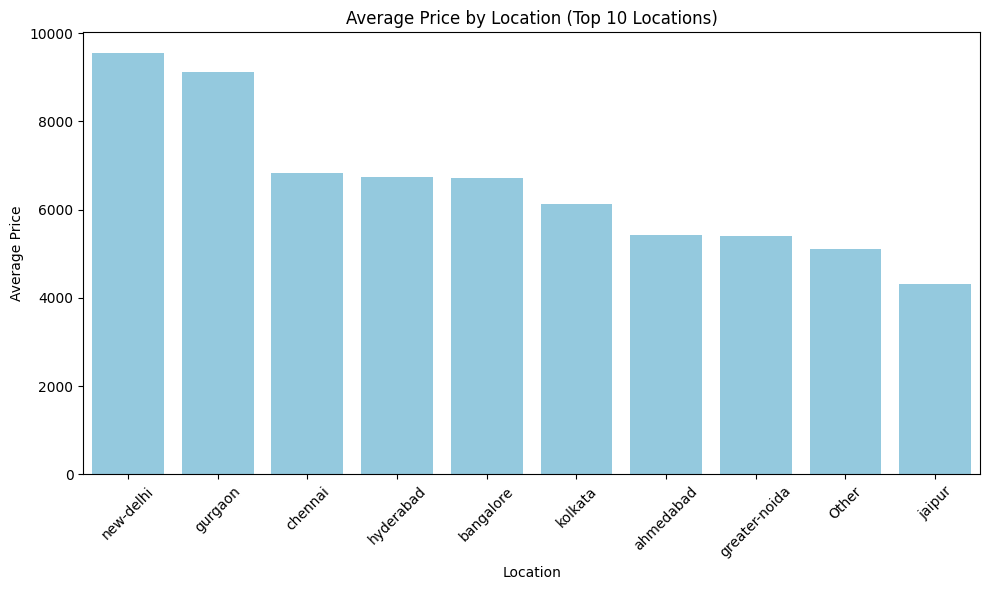

In [484]:
top10_locations = df['location'].value_counts().nlargest(10).index.tolist()
df_toploc = df[df['location'].isin(top10_locations)]
avg_price_by_location = df_toploc.groupby('location')['Price_filtered'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x = avg_price_by_location.index, y = avg_price_by_location.values, color = 'skyblue')
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.xlabel("Location")
plt.title("Average Price by Location (Top 10 Locations)")
plt.tight_layout()
plt.show()

## 1.4. Area

In [485]:
df['Carpet Area']

0          500 sqft
1          473 sqft
2          779 sqft
3          530 sqft
4          635 sqft
            ...    
187526          NaN
187527          NaN
187528    1250 sqft
187529          NaN
187530          NaN
Name: Carpet Area, Length: 187531, dtype: object

In [486]:
df['Area'] = df['Carpet Area'].combine_first(df['Super Area'])
df.drop(['Carpet Area', 'Super Area'], axis=1, inplace=True)

In [487]:
df['Area'].isna().sum()

np.int64(827)

In [488]:
areas = df['Area'].dropna().astype(str).str.lower()
areas = areas.str.strip()  
areas = areas.str.replace(r'\s+', ' ', regex=True)

def extract_unit(text):
    match = re.search(r'[a-z]+', text)
    return match.group(0) if match else 'unknown'

units = areas.apply(extract_unit).unique()

print("Unique units found in 'Area':")
for u in units:
    print(u)

Unique units found in 'Area':
sqft
sqm
sqyrd
marla
acre
ground
kanal
cent
bigha
biswa
aankadam
hectare


In [489]:
# Convert area to square feet
def convert_area(area):
    if pd.isnull(area):
        return np.nan

    conversion_factors = {
        'sqft': 1,
        'sqm': 10.7639,
        'sqyrd': 9,
        'acre': 43560,
        'ground': 2400,
        'cent': 435.6,
        'bigha': 17424,
        'marla': 272.25,
        'kanal': 5445
    }

    area = str(area).lower().strip()

    try:
        for unit, factor in conversion_factors.items():
            if unit in area:
                value = float(area.replace(unit, '').strip())
                return value * factor
    except ValueError:
        return np.nan

    return np.nan

In [490]:
df['Area_clean'] = df['Area'].apply(convert_area)
df['Area_clean'] = pd.to_numeric(df['Area_clean'], errors='coerce')

In [491]:
df['Area_clean'].head(10)

0    500.0
1    473.0
2    779.0
3    530.0
4    635.0
5    680.0
6    550.0
7    575.0
8    600.0
9    900.0
Name: Area_clean, dtype: float64

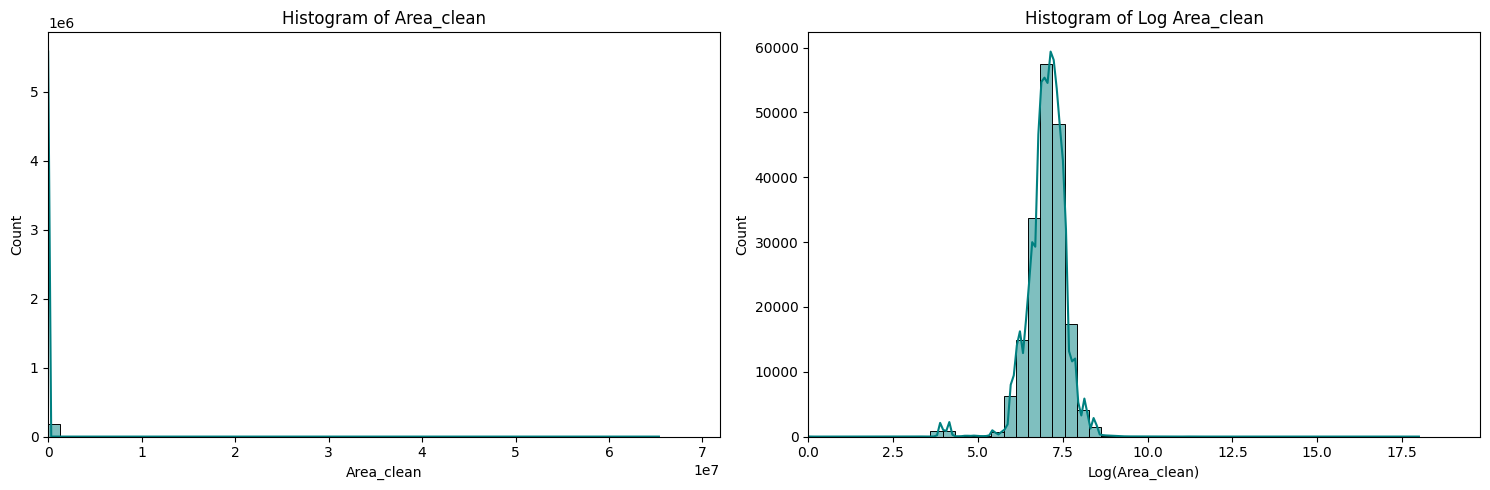

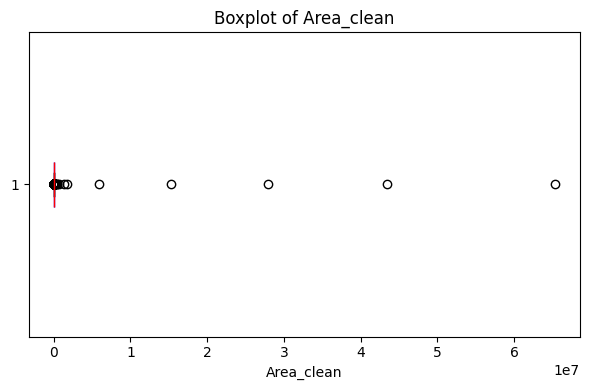

In [492]:
plot_hist_box(df, 'Area_clean')

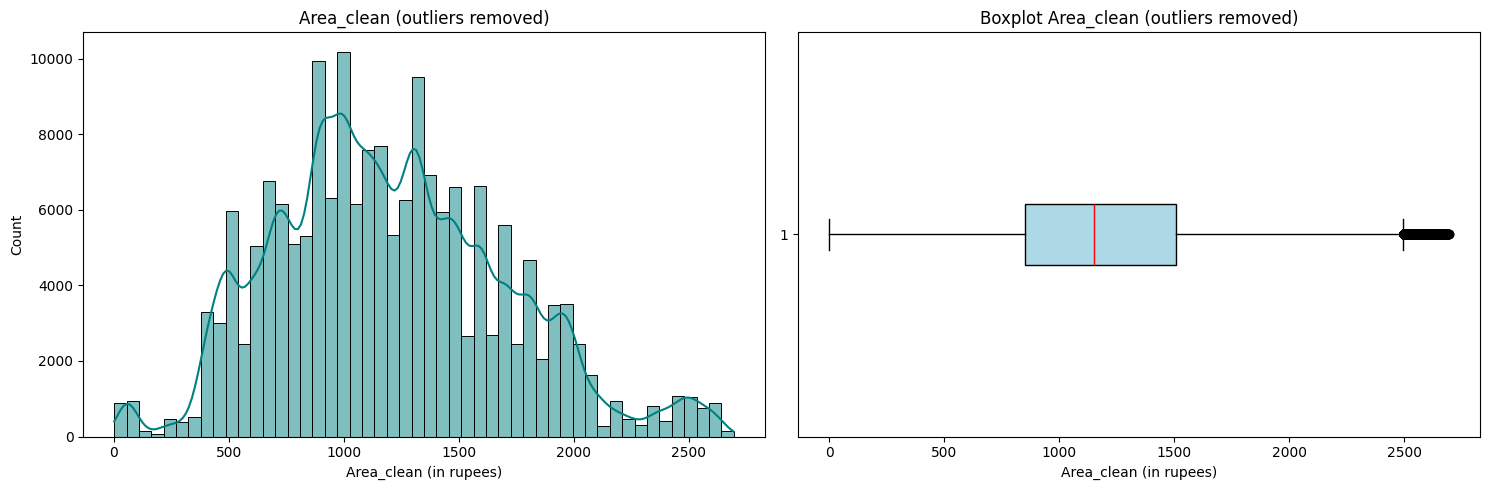

In [493]:
plot_hist_box_remove_outlier(df, 'Area_clean', 'Area_filtered')

## 1.5. Floor

In [494]:
df['Floor'].head(10)

0       10 out of 11
1        3 out of 22
2       10 out of 29
3         1 out of 3
4       20 out of 42
5         2 out of 7
6         4 out of 5
7    Ground out of 7
8    Ground out of 2
9        3 out of 27
Name: Floor, dtype: object

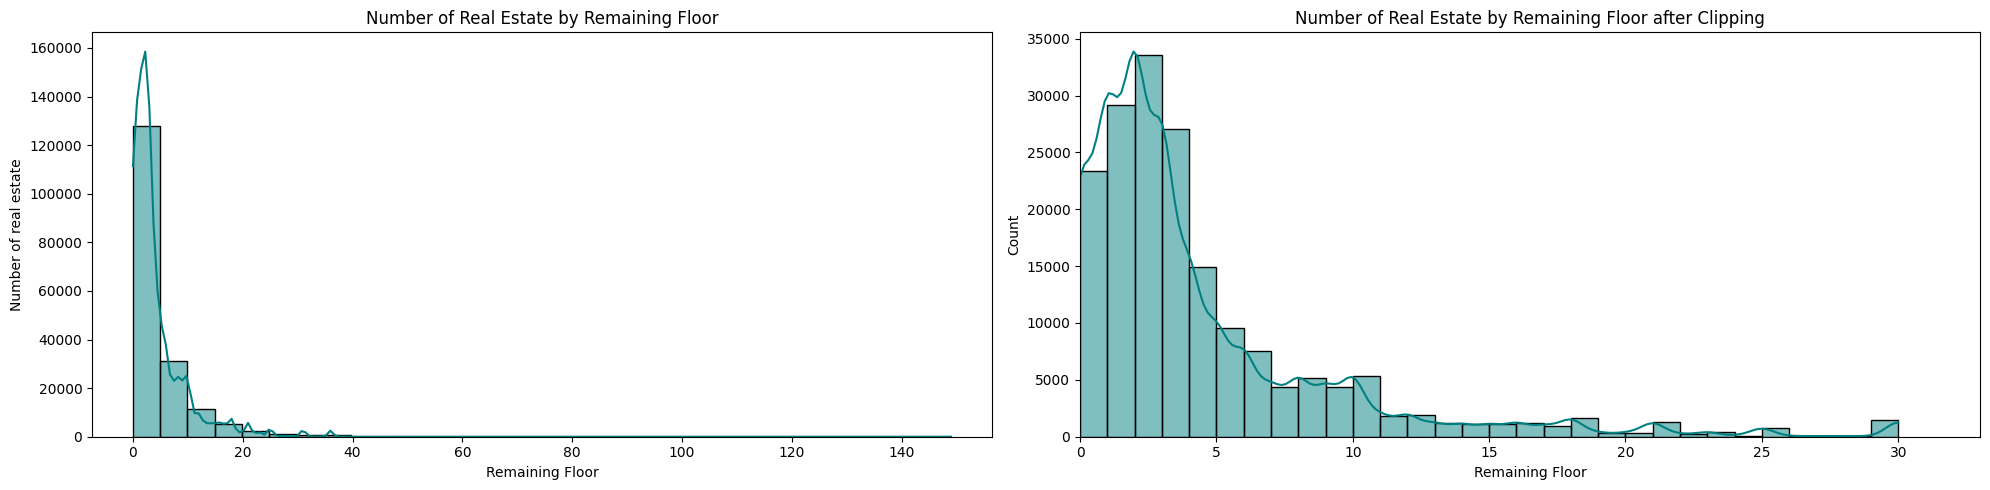

In [495]:
df['Floor_clean'] = df['Floor'].copy()

df['Floor_clean'] = df['Floor_clean'].str.replace(r'\s+', ' ', regex=True).str.strip()
df['Floor_clean'] = df['Floor_clean'].str.replace(r'(?i)ground', '0', regex=True)
df['Floor_clean'] = df['Floor_clean'].str.replace(r'(?i)Upper Basement', '-1', regex=True)
df['Floor_clean'] = df['Floor_clean'].str.replace(r'(?i)Lower Basement', '-2', regex=True)

df[['floor_current', 'floor_total']] = df['Floor_clean'].str.extract(r'(-?\d+)\s*out of\s*(-?\d+)', expand=True).astype(float)

# no_outof_notnull = df.loc[(df['Floor_clean'].notna()) & (~df['Floor_clean'].str.contains('out of', na=False))]
# print(no_outof_notnull[['Floor', 'Floor_clean', 'floor_current', 'floor_total']])
# print(f"Tổng số dòng Floor_clean không null nhưng không chứa 'out of': {len(no_outof_notnull)}")

df['floor_remaining'] = df['floor_total'] - df['floor_current']

# count_negative_remaining = (df['floor_remaining'] < 0).sum()
# print("Number of records having floor_remaining < 0:", count_negative_remaining)

df.loc[df['floor_current'] > df['floor_total'], 'floor_remaining'] = np.nan

# invalid_rows = df.loc[df['floor_current'] > df['floor_total'], ['Floor', 'floor_current', 'floor_total']]
# print("Records have floor_current > floor_total:")
# print(invalid_rows)
df['remaining_floor_clip'] = df['floor_remaining'].clip(upper=30)


plt.figure(figsize=(20, 5))
plt.subplot(121)
sns.histplot(df['floor_remaining'].dropna(), bins=30, kde=True, color='teal')
plt.title("Number of Real Estate by Remaining Floor")
plt.xlabel("Remaining Floor")
plt.ylabel("Number of real estate")

plt.subplot(122)
sns.histplot(df['remaining_floor_clip'].dropna(), bins=30, kde=True, color='teal')
plt.title("Number of Real Estate by Remaining Floor after Clipping")   
plt.xlabel("Remaining Floor")
plt.ylabel("Count")
plt.xlim(0, df['remaining_floor_clip'].max() * 1.1)

plt.tight_layout()
plt.show()


## 1.6. Transaction

In [496]:
df['Transaction'].value_counts()

Transaction
Resale          144172
New Property     42565
Other              709
Rent/Lease           2
Name: count, dtype: int64

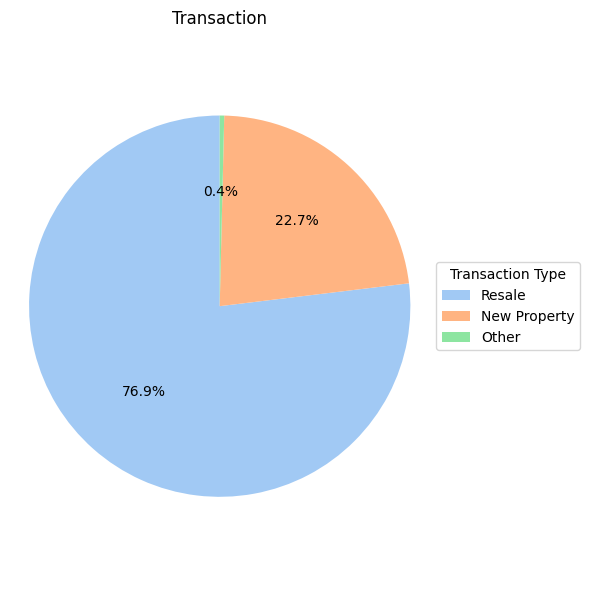

In [497]:
transaction_counts = df['Transaction'].value_counts()
total = transaction_counts.sum()    
threshold = 0.001 
filtered_counts = transaction_counts[transaction_counts / total >= threshold]

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    filtered_counts.values,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    textprops={'fontsize': 10}
)

plt.legend(wedges, filtered_counts.index, title="Transaction Type", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Transaction")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [498]:
df['Transaction'] = df['Transaction'].replace({'Rent/Lease': 'Other'})

In [499]:
df['Transaction'].value_counts()

Transaction
Resale          144172
New Property     42565
Other              711
Name: count, dtype: int64

## 1.7. Furnishing

In [500]:
furnish_counts = df['Furnishing'].value_counts()

In [501]:
furnish_counts

Furnishing
Semi-Furnished    88318
Unfurnished       76154
Furnished         20162
Name: count, dtype: int64

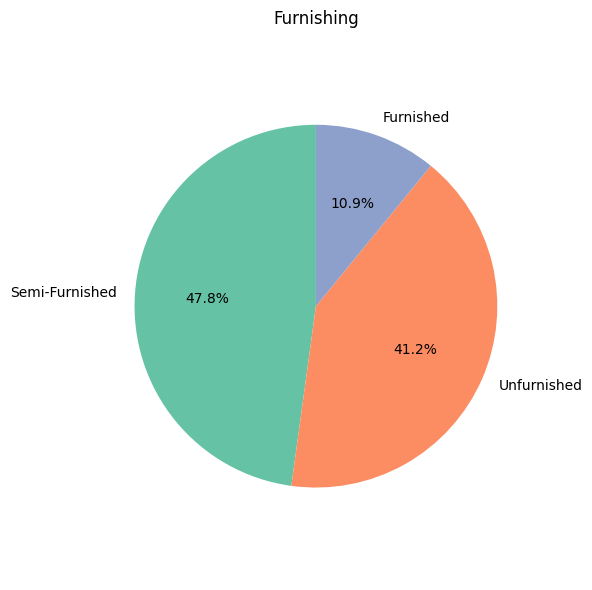

In [502]:
plt.figure(figsize=(6, 6))
plt.pie(furnish_counts, labels=furnish_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title("Furnishing")
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_50600\3436307579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Furnishing', y='Price_filtered', palette='Set2')


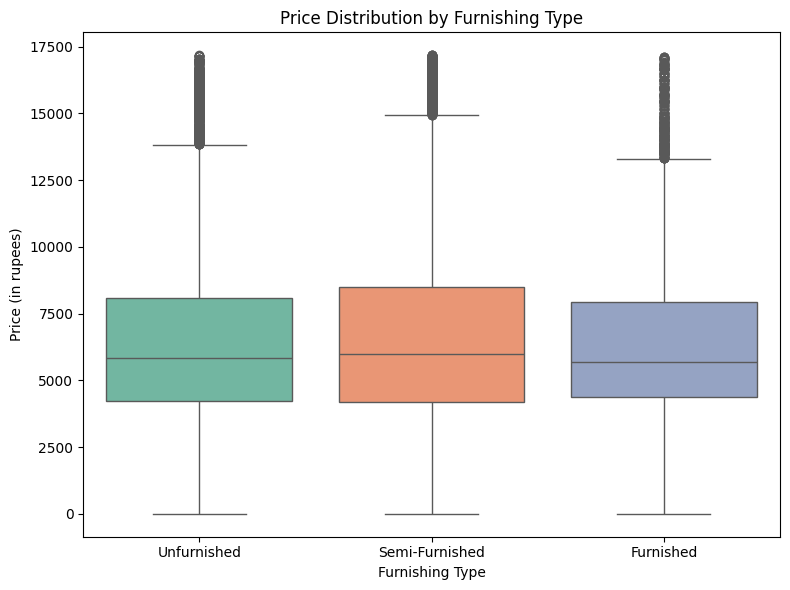

In [503]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Furnishing', y='Price_filtered', palette='Set2')
plt.title("Price Distribution by Furnishing Type")
plt.xlabel("Furnishing Type")
plt.ylabel("Price (in rupees)")
plt.tight_layout()
plt.show()

## 1.8. Facing

In [504]:
df['facing'].replace({'South -West' : 'South - West'}, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_50600\1471316831.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].replace({'South -West' : 'South - West'}, inplace=True)


In [505]:
facing_counts = df['facing'].value_counts(normalize=True) * 100

In [506]:
facing_counts

facing
East            46.668315
North - East    20.648263
North           14.094869
West             7.309588
South            4.001773
North - West     3.276271
South - East     2.235332
South - West     1.765589
Name: proportion, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_50600\2616471362.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=facing_counts.index, y=facing_counts.values, palette="pastel")


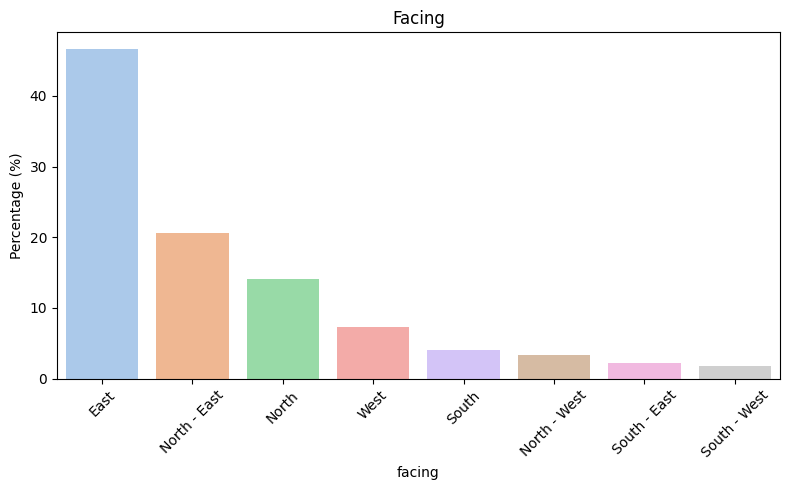

In [507]:
plt.figure(figsize=(8, 5))
sns.barplot(x=facing_counts.index, y=facing_counts.values, palette="pastel")
plt.ylabel("Percentage (%)")
plt.title("Facing")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

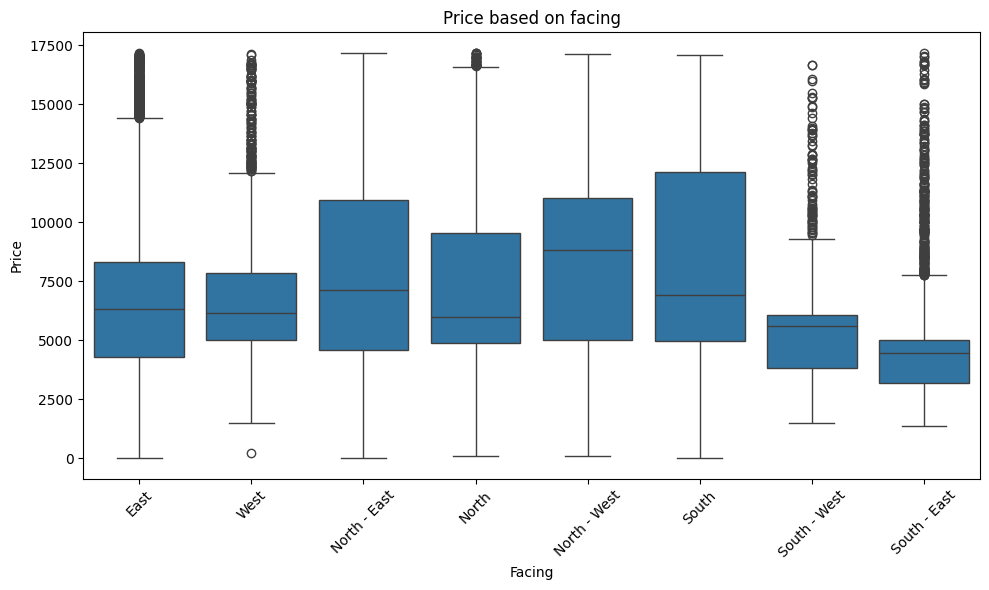

In [508]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='facing', y='Price_filtered', data=df)
plt.title('Price based on facing')
plt.ylabel('Price')
plt.xlabel('Facing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 1.9. Overlooking

In [509]:
overlooking_counts = df['overlooking'].value_counts()

In [510]:
overlooking_counts

overlooking
Main Road                                      32193
Garden/Park, Main Road                         27238
Garden/Park                                    23077
Garden/Park, Pool, Main Road                   12413
Pool, Garden/Park, Main Road                    3615
Garden/Park, Pool                               2880
Main Road, Garden/Park, Pool                    1359
Pool, Main Road                                 1136
Pool                                            1012
Main Road, Garden/Park                           666
Pool, Garden/Park                                435
Garden/Park, Main Road, Pool                      39
Main Road, Pool                                   11
Main Road, Pool, Garden/Park                       8
Pool, Main Road, Garden/Park                       6
Main Road, Not Available                           4
Garden/Park, Pool, Main Road, Not Available        1
Garden/Park, Not Available                         1
Pool, Main Road, Not Available    

In [511]:
unique_values = df['overlooking'].dropna().unique()
print("Unique values in 'overlooking':")
for val in unique_values:
    print(f"- {val}")

Unique values in 'overlooking':
- Garden/Park
- Garden/Park, Main Road
- Main Road
- Pool, Garden/Park, Main Road
- Garden/Park, Pool, Main Road
- Garden/Park, Pool
- Main Road, Garden/Park
- Main Road, Garden/Park, Pool
- Pool, Garden/Park
- Pool
- Garden/Park, Main Road, Pool
- Pool, Main Road
- Main Road, Pool, Garden/Park
- Pool, Main Road, Garden/Park
- Main Road, Not Available
- Main Road, Pool
- Garden/Park, Pool, Main Road, Not Available
- Garden/Park, Not Available
- Pool, Main Road, Not Available


C:\Users\Admin\AppData\Local\Temp\ipykernel_50600\3567059284.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=view_counts.index, y=view_counts.values, palette="viridis")


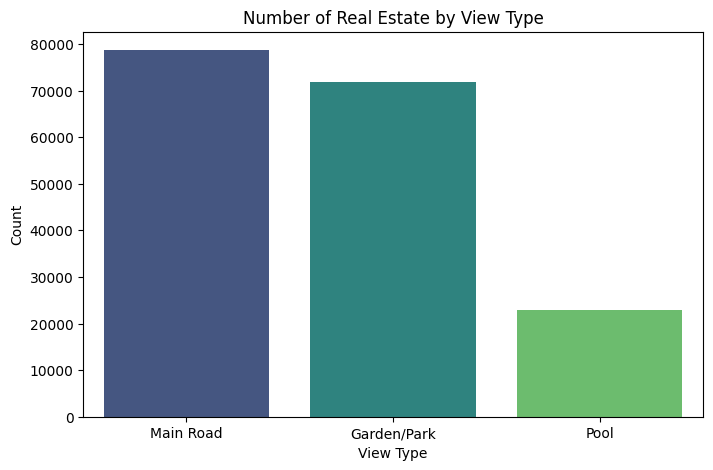

In [512]:
# Remove rows with 'Not Available' in 'overlooking'
df = df[~df['overlooking'].str.contains('Not Available', na=False)]
df['overlooking'] = df['overlooking'].fillna('')

view_features = ['Garden/Park', 'Pool', 'Main Road']

for view in view_features:
    df[view] = df['overlooking'].apply(lambda x: int(view in x))
df['total_views'] = df[view_features].sum(axis=1)
view_counts = df[['Garden/Park', 'Pool', 'Main Road']].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=view_counts.index, y=view_counts.values, palette="viridis")
plt.title("Number of Real Estate by View Type")
plt.ylabel('Count')
plt.xlabel('View Type')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_50600\3967476151.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_view, x='View_Type', y='Price_filtered', palette='viridis')


    Price_filtered    View_Type  Has_View
1          13799.0  Garden/Park         1
2              NaN  Garden/Park         1
4              NaN  Garden/Park         1
5           6618.0  Garden/Park         1
9          11150.0  Garden/Park         1
13             NaN  Garden/Park         1
15         10000.0  Garden/Park         1
16          5736.0  Garden/Park         1
18         11250.0  Garden/Park         1
20          8571.0  Garden/Park         1
21         15000.0  Garden/Park         1
22         12213.0  Garden/Park         1
26          6648.0  Garden/Park         1
28         14344.0  Garden/Park         1
29          7287.0  Garden/Park         1
30             NaN  Garden/Park         1
31         15196.0  Garden/Park         1
33         11008.0  Garden/Park         1
34          9643.0  Garden/Park         1
38         12369.0  Garden/Park         1


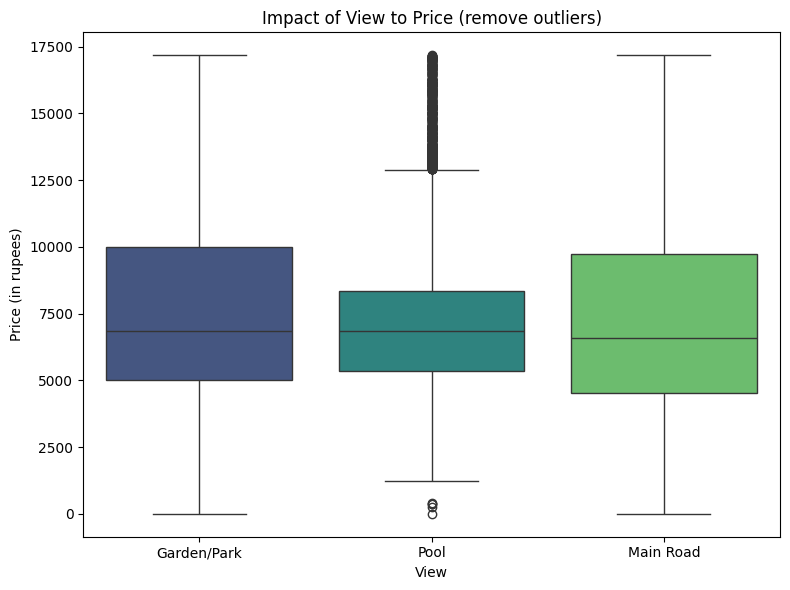

In [513]:
df_melted = df.melt(id_vars='Price_filtered', value_vars=view_features,
                        var_name='View_Type', value_name='Has_View')
# Filter out rows where Has_View is 0
df_view = df_melted[df_melted['Has_View'] == 1]
print(df_view.head(20))

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_view, x='View_Type', y='Price_filtered', palette='viridis')
plt.title('Impact of View to Price (remove outliers)')
plt.xlabel('View')
plt.ylabel('Price (in rupees)')
plt.tight_layout()
plt.show()

## 1.10. Bathroom and Balcony

In [514]:
def clean_and_clip_column(df, col_name):
    def convert(x):
        if pd.isna(x):
            return np.nan
        x = str(x).strip()
        if x.startswith('>'):
            return 11
        try:
            return int(x)
        except ValueError:
            return np.nan

    df[col_name] = df[col_name].apply(convert).clip(upper=5)

In [515]:
clean_and_clip_column(df, 'Bathroom')
clean_and_clip_column(df, 'Balcony')
df[['Bathroom', 'Balcony']].astype('Int64')

,Bathroom,Balcony
0,1,2
1,2,<NA>
2,2,<NA>
3,1,1
4,2,<NA>
...,...,...
187526,3,3
187527,3,<NA>
187528,3,2
187529,2,<NA>


In [516]:
df['Bathroom'].unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

In [517]:
df['Balcony'].unique()

array([ 2., nan,  1.,  3.,  4.,  5.])

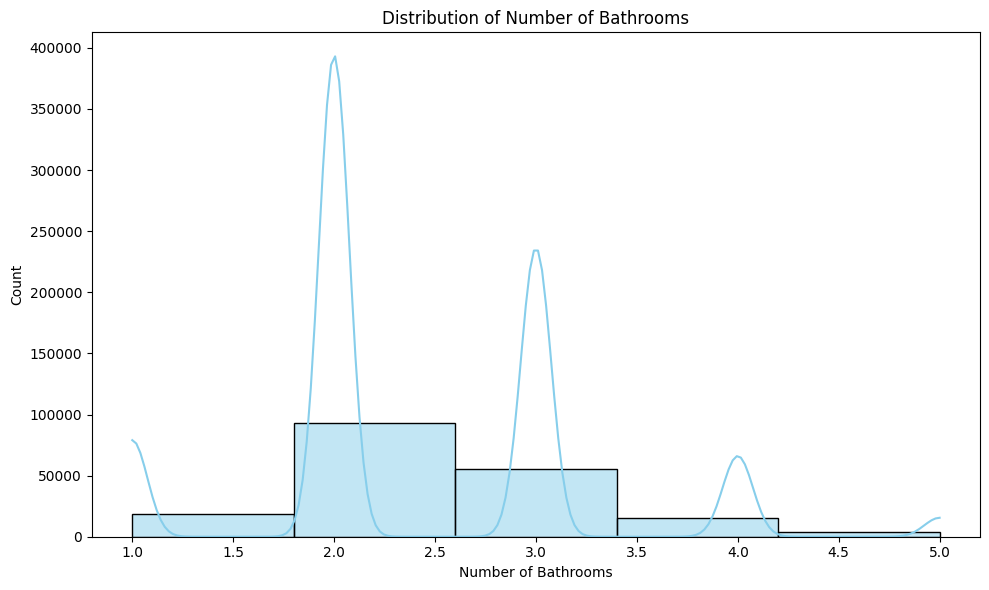

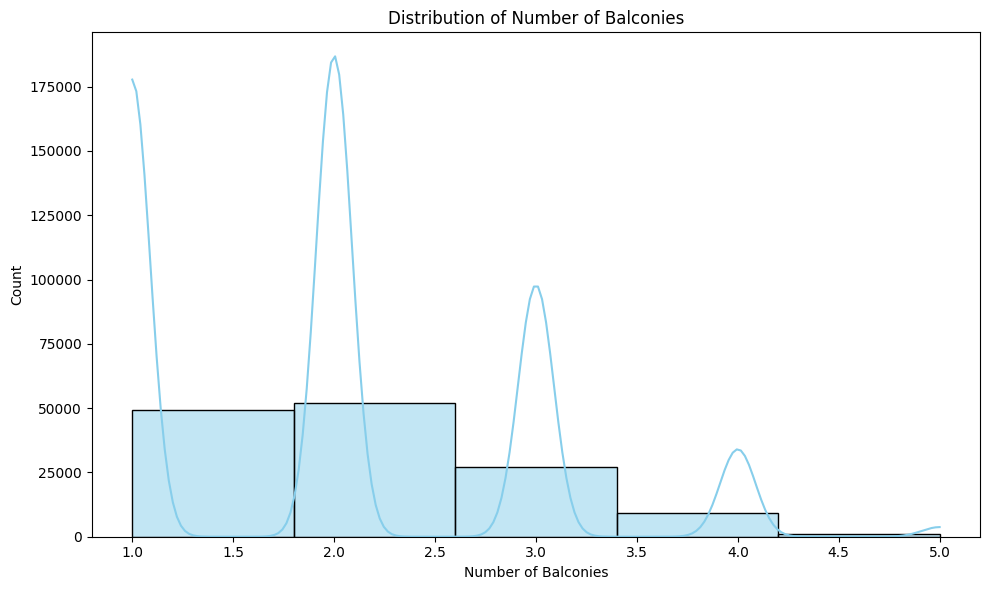

In [518]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Bathroom'].dropna(), bins=5, kde=True, color='skyblue')
plt.title('Distribution of Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Balcony'].dropna(), bins=5, kde=True, color='skyblue')
plt.title('Distribution of Number of Balconies')
plt.xlabel('Number of Balconies')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [519]:
df.columns

Index(['Index', 'Title', 'Description', 'Amount(in rupees)',
       'Price (in rupees)', 'location', 'Status', 'Floor', 'Transaction',
       'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony',
       'Car Parking', 'Ownership', 'Amount_clean', 'Amount_filtered',
       'Price_filtered', 'Area', 'Area_clean', 'Area_filtered', 'Floor_clean',
       'floor_current', 'floor_total', 'floor_remaining',
       'remaining_floor_clip', 'Garden/Park', 'Pool', 'Main Road',
       'total_views'],
      dtype='object')

## 1.11. Ownership

C:\Users\Admin\AppData\Local\Temp\ipykernel_50600\2394438461.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Ownership', palette='Set2')


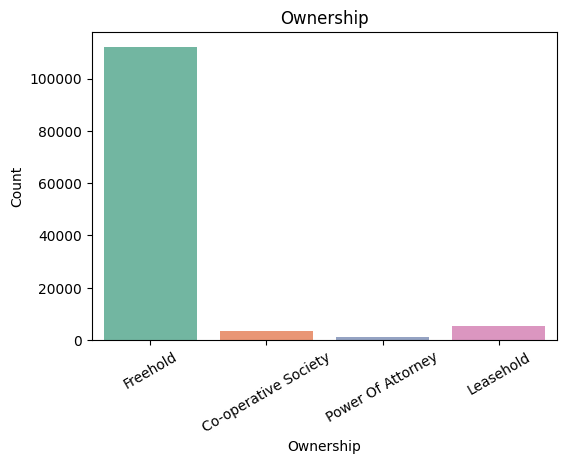

In [520]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Ownership', palette='Set2')
plt.title('Ownership')
plt.xticks(rotation=30)
plt.xlabel('Ownership')
plt.ylabel('Count')
plt.show()

## 1.12. Status

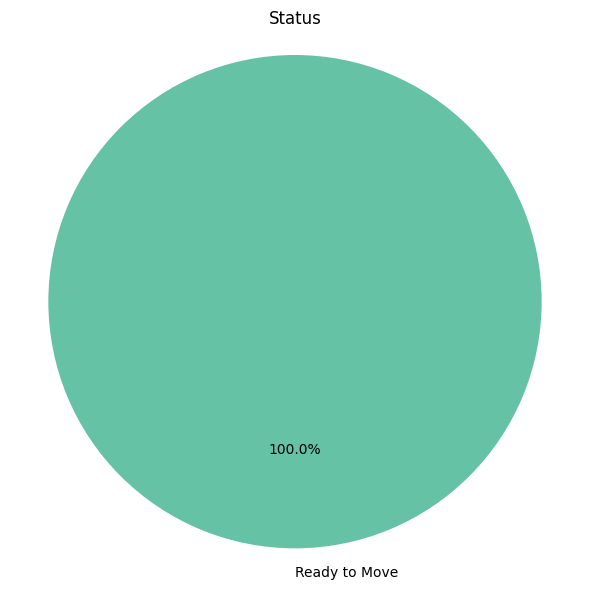

In [521]:
# Đếm số lượng từng loại Furnishing
status_counts = df['Status'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title("Status")
plt.axis('equal')
plt.tight_layout()
plt.show()

## 1.13. Title and Description

In [522]:
print(df['Title'].head(10))

0    1 BHK Ready to Occupy Flat for sale in Srushti...
1    2 BHK Ready to Occupy Flat for sale in Dosti V...
2    2 BHK Ready to Occupy Flat for sale in Sunrise...
3          1 BHK Ready to Occupy Flat for sale Kasheli
4    2 BHK Ready to Occupy Flat for sale in TenX Ha...
5    1 BHK Ready to Occupy Flat for sale in Virat A...
6           1 BHK Ready to Occupy Flat for sale Mumbra
7            1 BHK Ready to Occupy Flat for sale Kalwa
8            1 BHK Ready to Occupy Flat for sale Kalwa
9    3 BHK Ready to Occupy Flat for sale in Pride P...
Name: Title, dtype: object


In [523]:
df['Title'] = df['Title'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [524]:
def extract_bhk(text):
    if pd.isnull(text):
        return None
    match = re.search(r'(\d+)\s*BHK', text, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None

In [525]:
df['BHK'] = df.apply(
    lambda row: extract_bhk(row['Title']) or extract_bhk(row['Description']),
    axis=1
)
df['BHK'] = df['BHK'].astype('Int64')
df.drop(columns=['Title', 'Description'], inplace=True)
print(df['BHK'].head(10))

0    1
1    2
2    2
3    1
4    2
5    1
6    1
7    1
8    1
9    3
Name: BHK, dtype: Int64


## 1.14. Society

C:\Users\Admin\AppData\Local\Temp\ipykernel_50600\689138681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_society.values, y=top_society.index, palette="viridis")


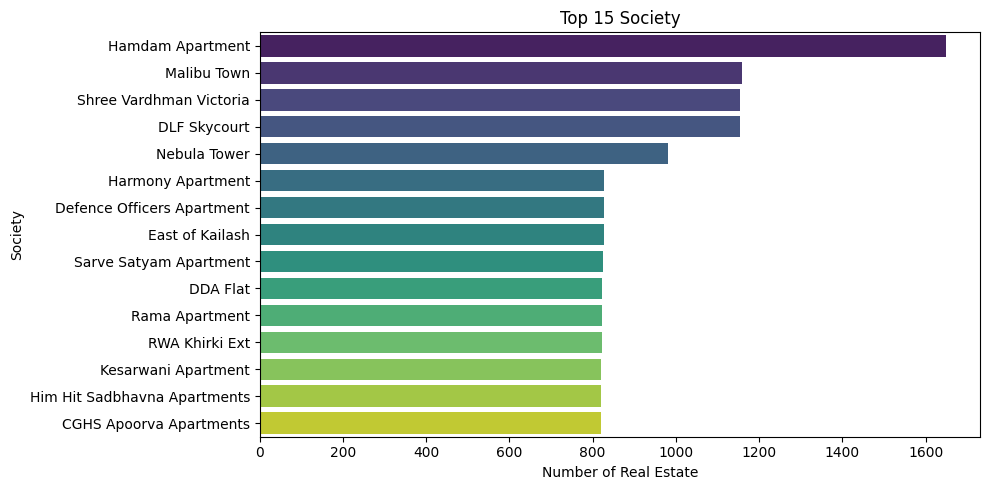

In [526]:
plt.figure(figsize=(10, 5))
top_society = df['Society'].value_counts().nlargest(15)  # Lấy top 15
sns.barplot(x=top_society.values, y=top_society.index, palette="viridis")
plt.title("Top 15 Society")
plt.xlabel("Number of Real Estate")
plt.ylabel("Society")
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_50600\2533663763.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_society.index, y=avg_price_by_society.values, palette='viridis')


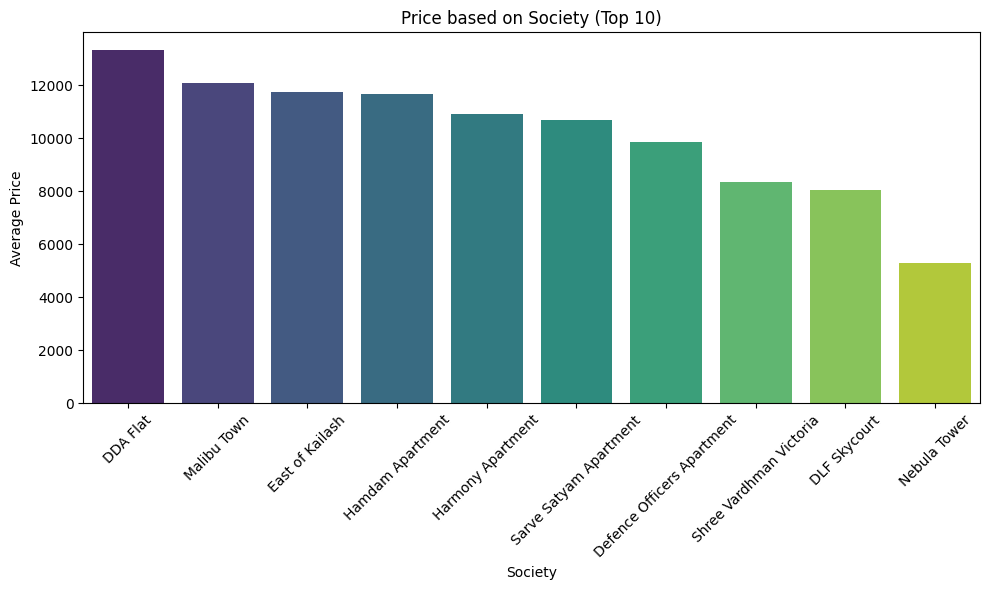

In [527]:
# Tính giá trung bình theo top 10 Society
top10_society = df['Society'].value_counts().nlargest(10).index.tolist()
df_topsoc = df[df['Society'].isin(top10_society)]
avg_price_by_society = (
    df_topsoc.groupby('Society')['Price_filtered']
    .mean()
    .sort_values(ascending=False)
)

# Vẽ bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_society.index, y=avg_price_by_society.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.xlabel("Society")
plt.title("Price based on Society (Top 10)")
plt.tight_layout()
plt.show()

# 1.15 Car Parking

In [528]:
def clean_car_parking(value):
    try:
        return int(str(value).strip().split()[0])
    except:
        return 0

df['Car Parking'] = df['Car Parking'].apply(clean_car_parking)
df['Car Parking'] = df['Car Parking'].clip(upper=3)

C:\Users\Admin\AppData\Local\Temp\ipykernel_50600\1109811000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Car Parking', palette='Set2')


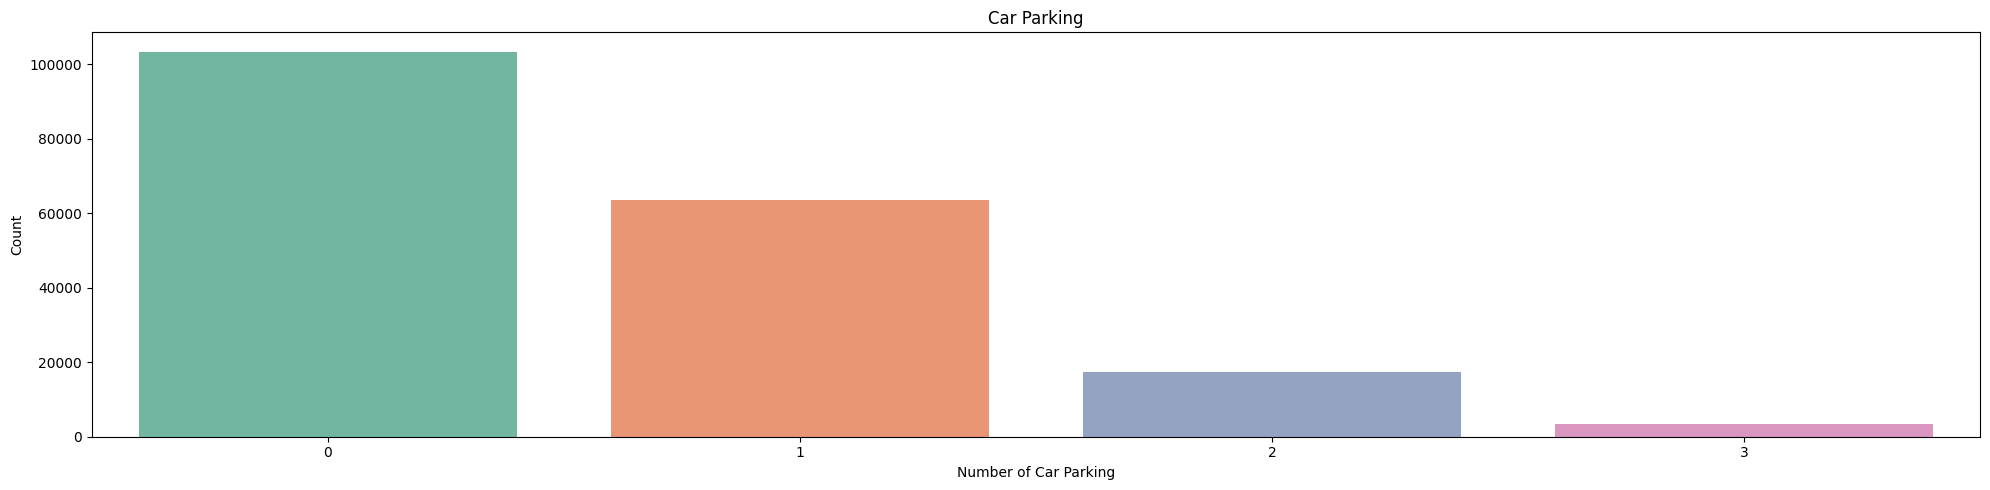

In [529]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x='Car Parking', palette='Set2')
plt.title('Car Parking')        
plt.xlabel('Number of Car Parking')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2. Handle Missing Values and One-Hot Encoding Categorical Variables

In [530]:
print(df.columns)

Index(['Index', 'Amount(in rupees)', 'Price (in rupees)', 'location', 'Status',
       'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking',
       'Society', 'Bathroom', 'Balcony', 'Car Parking', 'Ownership',
       'Amount_clean', 'Amount_filtered', 'Price_filtered', 'Area',
       'Area_clean', 'Area_filtered', 'Floor_clean', 'floor_current',
       'floor_total', 'floor_remaining', 'remaining_floor_clip', 'Garden/Park',
       'Pool', 'Main Road', 'total_views', 'BHK'],
      dtype='object')


In [531]:
cols = ['location', 'Transaction', 'Furnishing', 'facing',
       'Bathroom', 'Balcony', 'Car Parking', 'Amount_filtered', 'Price_filtered', 'Area_filtered', 'remaining_floor_clip', 
       'Garden/Park', 'Pool', 'Main Road', 'BHK']

In [532]:
df_filtered = df[cols]

In [533]:
df_filtered = df_filtered.rename(columns={
    'facing': 'Facing',
    'Price_filtered': 'Price',
    'Area_filtered': 'Area',
    'Amount_filtered': 'Amount',
    'remaining_floor_clip': 'Remaining_Floor',
    'location': 'Location',
    'Car Parking': 'Car_Parking'
})

In [534]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187524 entries, 0 to 187530
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Location         187524 non-null  object 
 1   Transaction      187441 non-null  object 
 2   Furnishing       184627 non-null  object 
 3   Facing           117291 non-null  object 
 4   Bathroom         186696 non-null  float64
 5   Balcony          138589 non-null  float64
 6   Car_Parking      187524 non-null  int64  
 7   Amount           165558 non-null  float64
 8   Price            161928 non-null  float64
 9   Area             179699 non-null  float64
 10  Remaining_Floor  180392 non-null  float64
 11  Garden/Park      187524 non-null  int64  
 12  Pool             187524 non-null  int64  
 13  Main Road        187524 non-null  int64  
 14  BHK              186603 non-null  Int64  
dtypes: Int64(1), float64(6), int64(4), object(4)
memory usage: 23.1+ MB


In [535]:
def print_missing_values(df):
    missing_data = pd.DataFrame({
        'Missing Values': df.isnull().sum(),
        'Percent (%)': (df.isnull().sum() / len(df)) * 100
    })
    missing_data['Percent (%)'] = missing_data['Percent (%)'].round(1)
    missing_data = missing_data.sort_values(by='Missing Values', ascending=False)
    print(missing_data)

In [536]:
num_cols = []
obj_cols = []
for col in df_filtered.columns:
    if df_filtered[col].dtype == 'object':
        obj_cols.append(col)
    else:
        num_cols.append(col)
print("Numerical columns:", num_cols)   
print("Object columns:", obj_cols)

Numerical columns: ['Bathroom', 'Balcony', 'Car_Parking', 'Amount', 'Price', 'Area', 'Remaining_Floor', 'Garden/Park', 'Pool', 'Main Road', 'BHK']
Object columns: ['Location', 'Transaction', 'Furnishing', 'Facing']


In [537]:
print_missing_values(df_filtered)

                 Missing Values  Percent (%)
Facing                    70233         37.5
Balcony                   48935         26.1
Price                     25596         13.6
Amount                    21966         11.7
Area                       7825          4.2
Remaining_Floor            7132          3.8
Furnishing                 2897          1.5
BHK                         921          0.5
Bathroom                    828          0.4
Transaction                  83          0.0
Location                      0          0.0
Car_Parking                   0          0.0
Garden/Park                   0          0.0
Pool                          0          0.0
Main Road                     0          0.0


In [538]:
df_filtered = df_filtered.dropna(subset=['Furnishing', 'BHK', 'Bathroom', 'Transaction', 'Price'])

In [539]:
df_filtered['Facing'].replace(np.nan, 'Unknown', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_50600\2417964838.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['Facing'].replace(np.nan, 'Unknown', inplace=True)


In [540]:
def fill_median(col_name):
    df_filtered[col_name].fillna(df_filtered[col_name].median(), inplace=True)

In [541]:
fill_median('Amount')
fill_median('Area')
fill_median('Remaining_Floor')

C:\Users\Admin\AppData\Local\Temp\ipykernel_50600\724531509.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered[col_name].fillna(df_filtered[col_name].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_50600\724531509.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [542]:
print_missing_values(df_filtered)

                 Missing Values  Percent (%)
Balcony                   41426         26.0
Transaction                   0          0.0
Location                      0          0.0
Furnishing                    0          0.0
Facing                        0          0.0
Bathroom                      0          0.0
Car_Parking                   0          0.0
Amount                        0          0.0
Price                         0          0.0
Area                          0          0.0
Remaining_Floor               0          0.0
Garden/Park                   0          0.0
Pool                          0          0.0
Main Road                     0          0.0
BHK                           0          0.0


In [543]:
def one_hot_endcode(df, col_name):
    dummies = pd.get_dummies(df[col_name], prefix=col_name)
    dummies = dummies.astype(int)
    df = df.drop(columns=[col_name])
    return pd.concat([df, dummies], axis=1)

In [544]:
for obj_col in obj_cols:
    df_filtered = one_hot_endcode(df_filtered, obj_col)

In [545]:
print(df_filtered.shape)

(159630, 41)


In [546]:
from sklearn.ensemble import RandomForestRegressor

df_known = df_filtered[df_filtered['Balcony'].notna()]
df_missing = df_filtered[df_filtered['Balcony'].isna()]

features = [col for col in df_filtered.columns if col != 'Balcony' and col != 'Price']

X_train = df_known[features]
y_train = df_known['Balcony']

X_missing = df_missing[features]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

model.fit(X_train, y_train)

balcony_pred = model.predict(X_missing)

balcony_pred = np.round(balcony_pred).astype(int)

df_filtered.loc[df_filtered['Balcony'].isna(), 'Balcony'] = balcony_pred

In [547]:
print_missing_values(df_filtered)

                           Missing Values  Percent (%)
Bathroom                                0          0.0
Balcony                                 0          0.0
Car_Parking                             0          0.0
Amount                                  0          0.0
Price                                   0          0.0
Area                                    0          0.0
Remaining_Floor                         0          0.0
Garden/Park                             0          0.0
Pool                                    0          0.0
Main Road                               0          0.0
BHK                                     0          0.0
Location_Other                          0          0.0
Location_ahmedabad                      0          0.0
Location_bangalore                      0          0.0
Location_chennai                        0          0.0
Location_faridabad                      0          0.0
Location_greater-noida                  0          0.0
Location_g

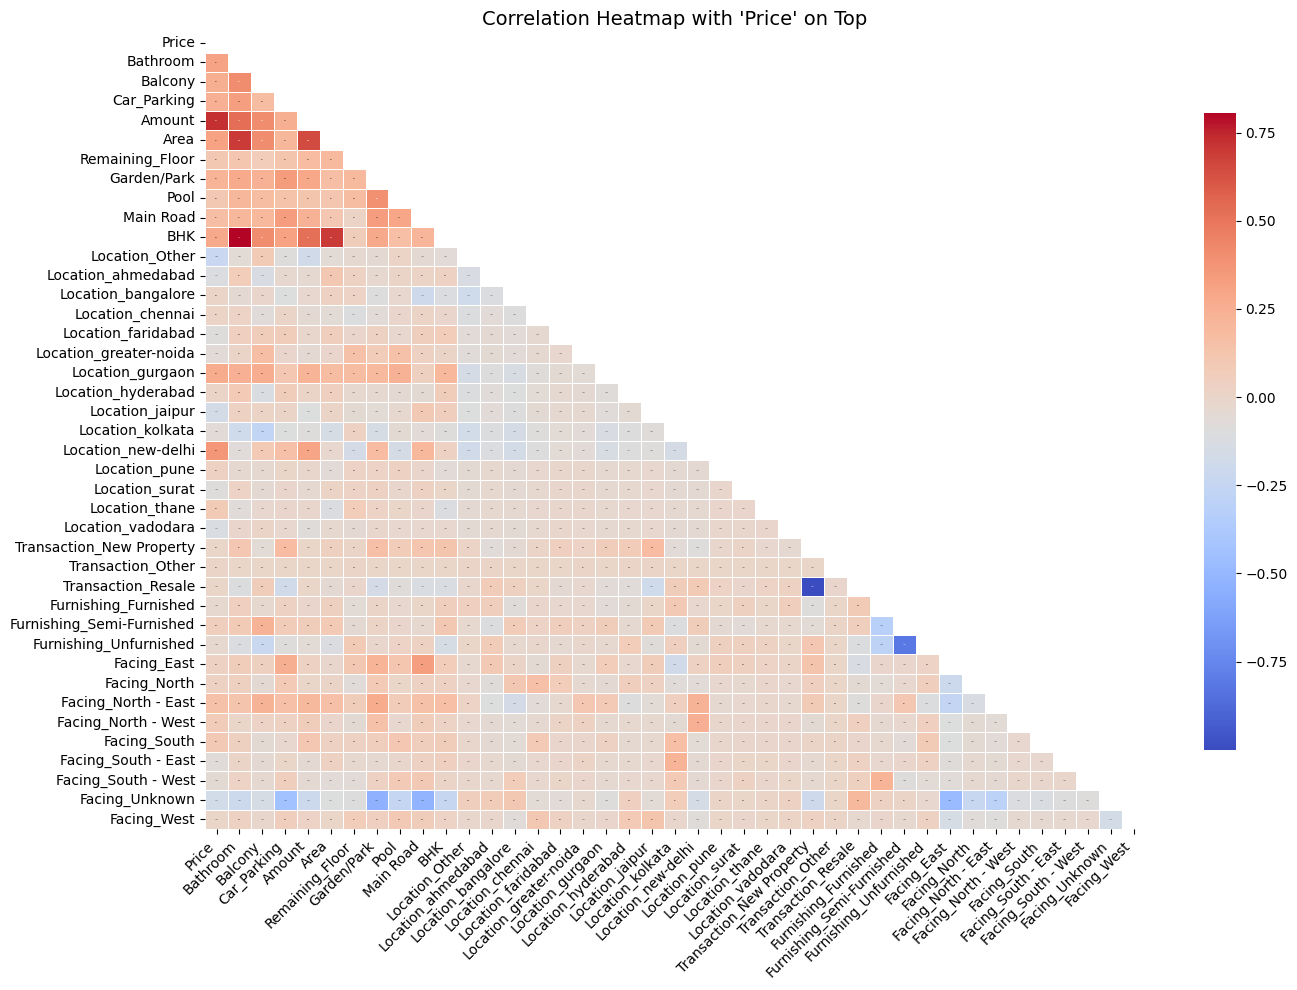

In [548]:
corr = df_filtered.corr(numeric_only=True)

cols = list(corr.columns)

cols.remove('Price')
cols = ['Price'] + cols
corr = corr.loc[cols, cols]

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            annot_kws={"size": 0}, cbar_kws={"shrink": 0.8}, linewidths=0.5)

plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)
plt.title("Correlation Heatmap with 'Price' on Top", fontsize=14)
plt.tight_layout()
plt.show()


In [549]:
df_filtered.to_csv("cleaned_dataset.csv", index=False)

In [551]:
df_filtered.columns

Index(['Bathroom', 'Balcony', 'Car_Parking', 'Amount', 'Price', 'Area',
       'Remaining_Floor', 'Garden/Park', 'Pool', 'Main Road', 'BHK',
       'Location_Other', 'Location_ahmedabad', 'Location_bangalore',
       'Location_chennai', 'Location_faridabad', 'Location_greater-noida',
       'Location_gurgaon', 'Location_hyderabad', 'Location_jaipur',
       'Location_kolkata', 'Location_new-delhi', 'Location_pune',
       'Location_surat', 'Location_thane', 'Location_vadodara',
       'Transaction_New Property', 'Transaction_Other', 'Transaction_Resale',
       'Furnishing_Furnished', 'Furnishing_Semi-Furnished',
       'Furnishing_Unfurnished', 'Facing_East', 'Facing_North',
       'Facing_North - East', 'Facing_North - West', 'Facing_South',
       'Facing_South - East', 'Facing_South - West', 'Facing_Unknown',
       'Facing_West'],
      dtype='object')

## 🏠 Dataset Description

### 📌 Numeric Features

| Column Name         | Description |
|---------------------|-------------|
| **Price**           | Final selling price (in rupees) (**Target variable**) |
| **Bathroom**        | Number of bathrooms |
| **Balcony**         | Number of balconies |
| **Car_Parking**     | Number of car parking spaces |
| **Amount**          | Total amount (in rupees) |
| **Area**            | Area of the property (in sqrt) |
| **Remaining_Floor** | Number of floors remaining of the real estate|
| **BHK**             | Number of bedrooms, halls, and kitchens |

---

### ✅ Binary Categorical Features

| Column Name       | Description |
|-------------------|-------------|
| **Garden/Park**   | Whether the property has access to a garden or park |
| **Pool**          | Whether the property has a swimming pool |
| **Main Road**     | Whether the property faces a main road |

---

### 🌍 Location (One-Hot Encoded)

Each represents a possible city where the property is located:

- `Location_ahmedabad`
- `Location_bangalore`
- `Location_chennai`
- `Location_faridabad`
- `Location_greater-noida`
- `Location_gurgaon`
- `Location_hyderabad`
- `Location_jaipur`
- `Location_kolkata`
- `Location_new-delhi`
- `Location_pune`
- `Location_surat`
- `Location_thane`
- `Location_vadodara`
- `Location_Other`

---

### 🏢 Transaction Type (One-Hot Encoded)

- `Transaction_New Property`
- `Transaction_Resale`
- `Transaction_Other`

---

### 🛋️ Furnishing Type (One-Hot Encoded)

- `Furnishing_Furnished`
- `Furnishing_Semi-Furnished`
- `Furnishing_Unfurnished`

---

### 🧭 Facing Direction (One-Hot Encoded)

- `Facing_East`
- `Facing_West`
- `Facing_North`
- `Facing_South`
- `Facing_North - East`
- `Facing_North - West`
- `Facing_South - East`
- `Facing_South - West`
- `Facing_Unknown`
